In [2]:
import requests
import bs4
import pandas as pd

In [3]:
data_list = []

page = 1
while page < 87:
    url = 'https://www.checkraka.com/car/?quicksearch_order=ASC&page=' + str(page)
    print(url)
    page += 1

    #ดึงข้อมูลของ 1 หน้าเวป
    data = requests.get(url)
    
    #แปลงเป็น BeautifulSoup
    soup = bs4.BeautifulSoup(data.text)
    
    #รายละเอียดข้อมูล 1 รายการ
    all_unit_tag = 'div'
    all_unit_attribute = 'class'
    all_unit_value = 'card'
    
    #รายละเอียดข้อมูลชื่อสินค้าในรายการนั้นๆ
    title_tag = 'a'

    #รายละเอียดข้อมูลราคาในสินค้ารายการนั้นๆ
    price_tag = 'label'
  
    
    
    #ดึงทุกรายการ
    all_unit_element = soup.find_all(all_unit_tag,{all_unit_attribute:all_unit_value})
    
    
    #ดึงข้อมูลทีละรายการบันทึกลง List
    for unit in all_unit_element:
        data_dict = dict()
        data_dict['title'] = unit.find(title_tag).text
        data_dict['price'] = unit.find(price_tag).text
        data_list.append(data_dict)
    
    #แจ้งเบื้องต้นว่าทำงานถึงหน้าไหน
    print('Completed page no. ...', page-1)

https://www.checkraka.com/car/?quicksearch_order=ASC&page=1
Completed page no. ... 1
https://www.checkraka.com/car/?quicksearch_order=ASC&page=2
Completed page no. ... 2
https://www.checkraka.com/car/?quicksearch_order=ASC&page=3
Completed page no. ... 3
https://www.checkraka.com/car/?quicksearch_order=ASC&page=4
Completed page no. ... 4
https://www.checkraka.com/car/?quicksearch_order=ASC&page=5
Completed page no. ... 5
https://www.checkraka.com/car/?quicksearch_order=ASC&page=6
Completed page no. ... 6
https://www.checkraka.com/car/?quicksearch_order=ASC&page=7
Completed page no. ... 7
https://www.checkraka.com/car/?quicksearch_order=ASC&page=8
Completed page no. ... 8
https://www.checkraka.com/car/?quicksearch_order=ASC&page=9
Completed page no. ... 9
https://www.checkraka.com/car/?quicksearch_order=ASC&page=10
Completed page no. ... 10
https://www.checkraka.com/car/?quicksearch_order=ASC&page=11
Completed page no. ... 11
https://www.checkraka.com/car/?quicksearch_order=ASC&page=12


In [4]:
vehicle = pd.DataFrame(data_list)
vehicle

,title,price
0,มาสด้า Mazda BT-50 Double Cab 4X4 3.0 SP 6AT ป...,"1,272,000 บาท"
1,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 350 e...,"4,080,000 บาท"
2,เปอโยต์ Peugeot 408 GT ปี 2024,"1,799,000 บาท"
3,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 220 d...,"3,930,000 บาท"
4,เปอโยต์ Peugeot 408 Allure Plus ปี 2024,"1,599,000 บาท"
...,...,...
1021,เฟียต Fiat-500 Lounge Premium-ปี 2010,"1,850,000 บาท"
1022,เฟียต Fiat-500 Limited by Diesel-ปี 2010,"1,980,000 บาท"
1023,เฟียต Fiat-500C Standard-ปี 2010,"2,190,000 บาท"
1024,โปรตอน Proton Saga Base Line MT ปี 2010,"399,000 บาท"


In [50]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1030 non-null   object
 1   price   1030 non-null   object
dtypes: object(2)
memory usage: 16.2+ KB


In [5]:
vehicle['title'].head(10)

0    มาสด้า Mazda BT-50 Double Cab 4X4 3.0 SP 6AT ป...
1    เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 350 e...
2                       เปอโยต์ Peugeot 408 GT ปี 2024
3    เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 220 d...
4              เปอโยต์ Peugeot 408 Allure Plus ปี 2024
5                   เปอโยต์ Peugeot 408 Allure ปี 2024
6     แอสตัน มาร์ติน Aston Martin-DB12 Volante-ปี 2024
7                    ฮอนด้า Honda City Turbo S ปี 2024
8            บีวายดี BYD Sealion6 DM-i Premium ปี 2024
9           จี๊ป Jeep-Wrangler Rubicon 4 doors-ปี 2024
Name: title, dtype: object

In [6]:
import re

def extract_year(text):
    match = re.search(r'ปี (\d{4})', text)
    return match.group(1) if match else None

vehicle['year'] = vehicle['title'].apply(extract_year)

In [7]:
vehicle['year']  = pd.to_numeric(vehicle['year'])

In [8]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1026 non-null   object
 1   price   1026 non-null   object
 2   year    1026 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.2+ KB


In [10]:
def extract_price(text):
    match = re.search(r'(.+) บาท', text)
    return match.group(1) if match else None

vehicle['price_new'] = vehicle['price'].apply(extract_price)
vehicle['price_new'] = pd.to_numeric(vehicle['price_new'].str.replace(",", "")) 


In [11]:
def extract_thai_name(text):
    match = re.search(r'([\u0E00-\u0E7F]+)', text)
    return match.group(1) if match else None

vehicle['thai_name'] = vehicle['title'].apply(extract_thai_name)

In [70]:
vehicle

,title,price,year,price_new,thai_name
0,มาสด้า Mazda BT-50 Double Cab 4X4 3.0 SP 6AT ป...,"1,272,000 บาท",2024,1272000.0,มาสด้า
1,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 350 e...,"4,080,000 บาท",2024,4080000.0,เมอร์เซเดส
2,เปอโยต์ Peugeot 408 GT ปี 2024,"1,799,000 บาท",2024,1799000.0,เปอโยต์
3,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 220 d...,"3,930,000 บาท",2024,3930000.0,เมอร์เซเดส
4,เปอโยต์ Peugeot 408 Allure Plus ปี 2024,"1,599,000 บาท",2024,1599000.0,เปอโยต์
...,...,...,...,...,...
1021,เฟียต Fiat-500 Lounge Premium-ปี 2010,"1,850,000 บาท",2010,1850000.0,เฟียต
1022,เฟียต Fiat-500 Limited by Diesel-ปี 2010,"1,980,000 บาท",2010,1980000.0,เฟียต
1023,เฟียต Fiat-500C Standard-ปี 2010,"2,190,000 บาท",2010,2190000.0,เฟียต
1024,โปรตอน Proton Saga Base Line MT ปี 2010,"399,000 บาท",2010,399000.0,โปรตอน


In [71]:
df = vehicle.copy()
df

,title,price,year,price_new,thai_name
0,มาสด้า Mazda BT-50 Double Cab 4X4 3.0 SP 6AT ป...,"1,272,000 บาท",2024,1272000.0,มาสด้า
1,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 350 e...,"4,080,000 บาท",2024,4080000.0,เมอร์เซเดส
2,เปอโยต์ Peugeot 408 GT ปี 2024,"1,799,000 บาท",2024,1799000.0,เปอโยต์
3,เมอร์เซเดส-เบนซ์ Mercedes-benz E-Class E 220 d...,"3,930,000 บาท",2024,3930000.0,เมอร์เซเดส
4,เปอโยต์ Peugeot 408 Allure Plus ปี 2024,"1,599,000 บาท",2024,1599000.0,เปอโยต์
...,...,...,...,...,...
1021,เฟียต Fiat-500 Lounge Premium-ปี 2010,"1,850,000 บาท",2010,1850000.0,เฟียต
1022,เฟียต Fiat-500 Limited by Diesel-ปี 2010,"1,980,000 บาท",2010,1980000.0,เฟียต
1023,เฟียต Fiat-500C Standard-ปี 2010,"2,190,000 บาท",2010,2190000.0,เฟียต
1024,โปรตอน Proton Saga Base Line MT ปี 2010,"399,000 บาท",2010,399000.0,โปรตอน


In [72]:
df.drop(['price','title'], axis=1, inplace=True)

In [73]:
df

,year,price_new,thai_name
0,2024,1272000.0,มาสด้า
1,2024,4080000.0,เมอร์เซเดส
2,2024,1799000.0,เปอโยต์
3,2024,3930000.0,เมอร์เซเดส
4,2024,1599000.0,เปอโยต์
...,...,...,...
1021,2010,1850000.0,เฟียต
1022,2010,1980000.0,เฟียต
1023,2010,2190000.0,เฟียต
1024,2010,399000.0,โปรตอน


In [74]:
df = df.dropna()

In [17]:
import seaborn as sns 

In [96]:
group_year = df.groupby(['year'])[['price_new']].mean()
group_year['price_new'] = group_year['price_new'].astype(int)
group_year = group_year.reset_index()
group_year


,year,price_new
0,2010,1511625
1,2011,38500000
2,2012,6067733
3,2013,12528947
4,2014,14772225
5,2015,15523200
6,2016,5996647
7,2017,10515227
8,2018,7820363
9,2019,7237890


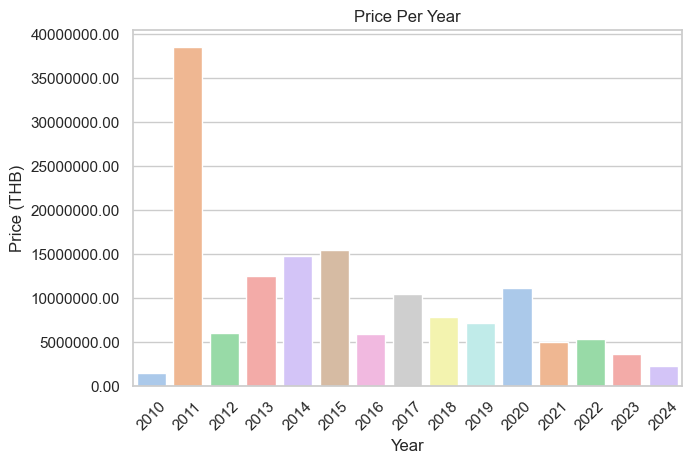

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker




# สร้าง Bar Chart  
sns.barplot(x='year', y='price_new', data=group_year, palette="pastel",width=0.8)

# เพิ่มชื่อกราฟและชื่อแกน
plt.title('Price Per Year')
plt.xlabel('Year')
plt.ylabel('Price (THB)')

plt.xticks(rotation=45)  # หมุนป้ายเพื่อป้องกันการซ้อนทับ
plt.tight_layout()  # ปรับขนาดกราฟให้พอดี
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))


 
plt.show()